**Installing packages for Yahoo Stock data and Tensorflow library**

In [1]:
!pip install yfinance
!pip install yahoofinancials

!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 33.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 52.7 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.6-cp310-cp310-linux_x86_64.whl size=851888 sha256=e0fa0b05bc94bf53fe555eed7cae0ebcefc6a28ad8e512c02a0f90cae0bc67e6
  Stored in directory: /root/.cache/pip/wheels/4b/b9/b0/83d6e258e8f963f5ff111a2cd8c483ca59372a86e6a2535212
Successfully built peewee

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

**Importing necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf

E0000 00:00:1724819966.426376      13 common_lib.cc:798] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: ===
learning/45eac/tfrc/runtime/common_lib.cc:479
D0828 04:39:26.434609337      13 config.cc:196]                        gRPC EXPERIMENT call_status_override_on_cancellation   OFF (default:OFF)
D0828 04:39:26.434623708      13 config.cc:196]                        gRPC EXPERIMENT call_v3                                OFF (default:OFF)
D0828 04:39:26.434627554      13 config.cc:196]                        gRPC EXPERIMENT canary_client_privacy                  ON  (default:ON)
D0828 04:39:26.434630410      13 config.cc:196]                        gRPC EXPERIMENT capture_base_context                   ON  (default:ON)
D0828 04:39:26.434633367      13 config.cc:196]                        gRPC EXPERIMENT client_idleness                        ON  (defau

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

**Setting the start and end date for our data**

In [4]:
start="2020-01-01"
end=date.today().strftime("%Y-%m-%d")
print(end, type(end))

2024-08-28 <class 'str'>


**Defining function for loading the data**

In [5]:
def load_input(ab):
    ip=yf.download(ab, start, end)
    ip.reset_index(inplace=True)
    return ip

**Loading the data of the company 'Apple Inc.'**

In [6]:
ip=load_input('AAPL')
df=ip
df.tail()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
1166,2024-08-21,226.520004,227.979996,225.050003,226.399994,226.399994,34765500
1167,2024-08-22,227.789993,228.339996,223.899994,224.529999,224.529999,43695300
1168,2024-08-23,225.660004,228.220001,224.330002,226.839996,226.839996,38677300
1169,2024-08-26,226.759995,227.279999,223.889999,227.179993,227.179993,30602200
1170,2024-08-27,226.000000,228.850006,224.889999,228.029999,228.029999,35886100


In [7]:
df.shape

(1171, 7)

**Plotting the data in 'Close' cloumn of the dataframe (which we consider for predictions)**

Text(0.5, 1.0, 'Apple Inc. Stock price data')

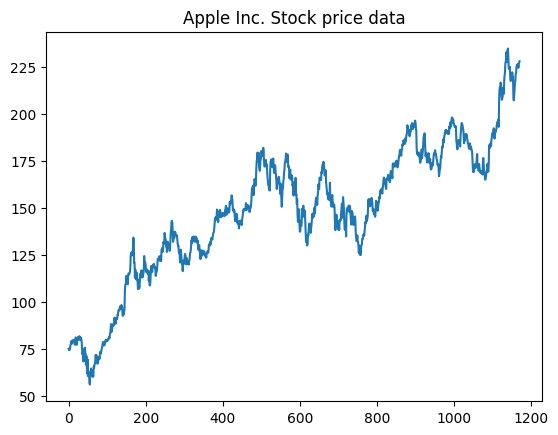

In [8]:
plt.plot(df["Close"])
plt.title("Apple Inc. Stock price data")

**To reset just the indices of 'Close' column of the dataframe**

In [9]:
dfa=df.reset_index()["Close"]
dfa

0        75.087502
1        74.357498
2        74.949997
3        74.597504
4        75.797501
           ...    
1166    226.399994
1167    224.529999
1168    226.839996
1169    227.179993
1170    228.029999
Name: Close, Length: 1171, dtype: float64

Text(0.5, 1.0, 'Apple Inc. Stock price data')

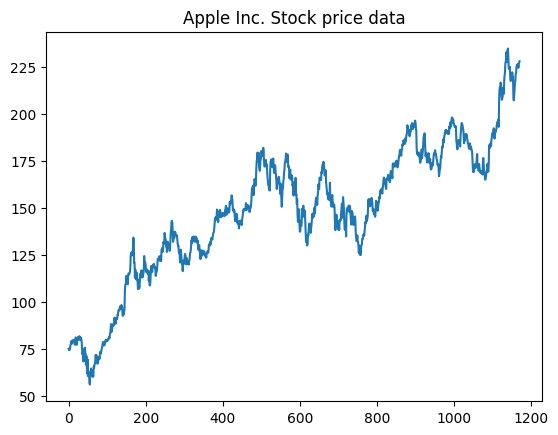

In [10]:
plt.plot(dfa)
plt.title("Apple Inc. Stock price data")

**Normalising Data**

In [11]:
scaled=MinMaxScaler(feature_range=(0, 1))
dfa=scaled.fit_transform(np.array(dfa).reshape(-1, 1))

In [12]:
print(dfa)
print(type(dfa))
print(dfa.shape)

[[0.10627912]
 [0.10219467]
 [0.10550977]
 ...
 [0.95535096]
 [0.95725328]
 [0.96200916]]
<class 'numpy.ndarray'>
(1171, 1)


**Splitting the data into training and test set (70:30)**

In [13]:
train_size=int(len(dfa)*0.7)
test_size=len(dfa)-train_size
print("Train Size : ", train_size, "; Test Size : ", test_size)

Train Size :  819 ; Test Size :  352


In [14]:
train_set=dfa[:train_size]
test_set=dfa[train_size:]
print(train_set.shape, test_set.shape, type(train_set))

(819, 1) (352, 1) <class 'numpy.ndarray'>


**Creating input and output datasets for Supervised Learning**

In [15]:
def create_x_y(dataset, ts):
    x, y=[], []
    for i in range(len(dataset) - ts - 1):
        a=dataset[i: (i+ts), 0]
        x.append(a)
        b=dataset[(i+ts), 0]
        y.append(b)
    return np.array(x, ndmin=2), np.array(y, ndmin=2).T

In [17]:
t=60 #Number of timesteps
x_train, y_train=create_x_y(train_set, t)
x_test, y_test=create_x_y(test_set, t)

In [18]:
print(x_train.shape)

(758, 60)


**Function to reshape array passed to LSTM into the required shape : (Batch size, no. of time steps, no. of features)**

In [19]:
def lstm_req_shape(arr):
    return arr.reshape(arr.shape[0], arr.shape[1], 1)

In [20]:
print(lstm_req_shape(x_train).shape)
print(lstm_req_shape(x_test).shape)

(758, 60, 1)
(291, 60, 1)


**Clearing the resoures allocated by backend framework**

In [23]:
from keras import backend as K
K.clear_session()

**Creating, compiling and training the model**

In [34]:
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    model=Sequential()
    model.add(LSTM(50, activation = 'relu', return_sequences=True,input_shape=(t,1)))
    model.add(Dropout(0.2))

    model.add(LSTM(50, activation = 'relu', return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(50, activation = 'relu', return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(50, activation = 'relu'))
    model.add(Dropout(0.2))

    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    h = model.fit(x_train, y_train, epochs=50)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 0.1252 - mean_absolute_error: 0.3074
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0130 - mean_absolute_error: 0.0931
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0096 - mean_absolute_error: 0.0793
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0083 - mean_absolute_error: 0.0709
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0070 - mean_absolute_error: 0.0645
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0059 - mean_absolute_error: 0.0609
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0049 - mean_absolute_error: 0.0542
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0048 - mean_absolute_error: 0.0537
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0061 - mean_absolute_error: 0.0605
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━

In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,155 (832.64 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,104 (555.10 KB)

**Predicting Stock Prices for Test dataset**

In [36]:
y_pred_A = model.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


**Checking Model's Performance**

In [37]:
print("Latest Loss : ", h.history['loss'][-1])

Latest Loss :  0.0027607751544564962


In [38]:
mae = mean_absolute_error(y_test, y_pred_A)
print("mean absolute error: ", mae)

mae_percentage = (mae / np.mean(y_test)) * 100
print(f"Mean absolute error percentage: {mae_percentage:.2f} %")

mean absolute error:  0.07001011495549032
Mean absolute error percentage: 9.38 %


**Visualising test dataset predictions and actual values of test dataset for stock prices**

In [39]:
y_pred_A = scaled.inverse_transform(y_pred_A)
y_test = scaled.inverse_transform(y_test)
y_train = scaled.inverse_transform(y_train)

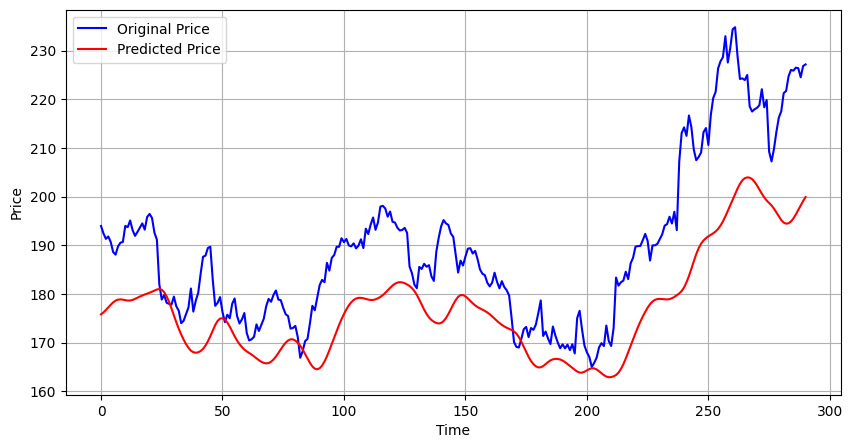

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_pred_A, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
